# Objetivos

Nesse exercício relacionado ao tema LSSVM (Least Squares Support Vector Machine), busca-se aplicar o classificador LSSVM a um problema de classificação real. Deseja-se ao final deste exercício conseguir realizar uma classificação de tipos de vidros do dataset "Glass Identification Database", encontrado em [1]. 

Esse *dataset* possui 214 intâncias e 9 atributos além de um identificador. Abaixo podem ser vistas algumas informações sobre os atributos.


   1. Id number: 1 a 214
   2. RI: índice de refração
   3. Na: Sódio (unidade de medida: porcentagem no peso do óxido correspondente, assim como nos atributos 4-10)
   4. Mg: Magnésio
   5. Al: Alumínio
   6. Si: Silício
   7. K: Potássio
   8. Ca: Cálcio
   9. Ba: Bário
   10. Fe: Ferro
   11. Tipo de vidro: (atributo de classe)
  
      - 1 building_windows_float_processed
      - 2 building_windows_non_float_processed
      - 3 vehicle_windows_float_processed
      - 4 vehicle_windows_non_float_processed (none in this database)
      - 5 containers
      - 6 tableware
      - 7 headlamps



# Carregar base de dados

In [1]:
# Imports:
from numpy import pi
import pandas as pd
from sklearn.model_selection import train_test_split
from lssvm import LSSVC
from utils.encoding import dummie2multilabel
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV 
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import itertools
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset:
headers = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
df = pd.read_csv("~/Documents/UFMG/10/Reconhecimento de padrões/list/pattern-recognition-exercises/list_5/databases/glass.csv", names = headers)
#df.columns = headers
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Pré processamento dos dados

Abaixo retirou-se a coluna Id e separou-se os dados de atributos (X) dos de classe (y). Além disso, foi realizada a normalização dos dados.

In [3]:
X = df.drop("Class", axis=1)
X = X.drop("Id", axis=1).to_numpy()
y = df["Class"].to_numpy()
normalizer = StandardScaler()
X = normalizer.fit_transform(X)

# Treinamento e validação 

Como requisitado, abaixo está mostrado a acurácia média e desvio padrão para 10 experimentos variando randomicamente o conjunto de treinamento e teste. A cada iteração 85% dos dados foram usados para treinamento e 15% para teste.

In [4]:
acc = np.zeros(10)
best_result = (0, 0)
best_params = (0, 0)
for gamma, sigma in itertools.product(range(1, 10), range(1,10)):
    for i in range(0, 10):
        # Separate data between training and test:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        # Training:
        clf = LSSVC(gamma=gamma, kernel='rbf', sigma=sigma)
        clf.fit(X_train, y_train)

        # Call predict on the estimator with the best found parameters.
        y_pred = clf.predict(X_test)
        acc[i] = (accuracy_score(y_test,y_pred))
    
    if acc.mean() >= best_result[0]:
        best_result = (acc.mean(), acc.std())
        best_params = (gamma, sigma)

print("O melhor resultado foi obtido para gamma = " + str(best_params[0]) + " e sigma = " + str(best_params[1]))        
print("A acurácia média e desvio padrão para 10 experimentos foi:")
print('{:.3f}'.format(best_result[0]) + " +/- " + '{:.3f}'.format(best_result[1])) 

O melhor resultado foi obtido para gamma = 8 e sigma = 6
A acurácia média e desvio padrão para 10 experimentos foi:
0.747 +/- 0.052


Como pode-se ver acima, o modelo gerado obteve uma acurácia de 0.747 +/- 0.052, considerando os 10 experimentos realizados. Esse resultado foi obtido pelo modelo gerado com os parâmetros: gamma = 2  e sigma = 3.

Para o último experimento foi gerada ainda a matrix de confusão da classificação. 

[[ 9  3  0  0  0  0]
 [ 0 10  0  1  0  0]
 [ 2  0  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  1  1  0]
 [ 1  0  0  0  0 11]]
Acc: 0.7906976744186046


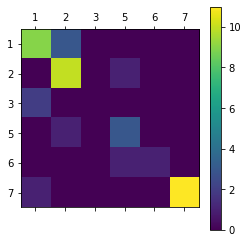

In [9]:
clf = LSSVC(gamma=8, kernel='rbf', sigma=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
df_confusion = confusion_matrix(y_test, y_pred)
print(df_confusion)

def plot_confusion_matrix(df_confusion, cmap=plt.cm.viridis):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title("title")
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test))
    plt.yticks(tick_marks, np.unique(y_test))
    #plt.tight_layout()
    
plot_confusion_matrix(df_confusion)
print("Acc: " + str(accuracy_score(y_test,y_pred)))

Acredita-se que não foi possível obter um classificador melhor devido a pequena quantidade de dados e também ao fato de a quantidade de dados por classe estar desbalanceada.

# Referências

[1] Blake, Catherine. "UCI repository of machine learning databases." http://www.ics.uci.edu/~mlearn/MLRepository.html (1998).